In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pickle
import os

In [4]:
print("Lets see the Dataset Values.........\n")
try:
    df = pd.read_csv("Data Sheet/laptops.csv")
except FileNotFoundError:
    print("File not found")
except Exception as e:
    print(f"Error found : {e}") 


Lets see the Dataset Values.........



In [5]:
print("Lets see some data of this data sheet..........\n")
df.head()

Lets see some data of this data sheet..........



,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [6]:
print("Lets See the Shape of the Datasets............\n")
print(f"The Total Columns of the Data set is {df.shape[1]} and the total rows of the Dataset is {df.shape[0]}.\n")

Lets See the Shape of the Datasets............

The Total Columns of the Data set is 12 and the total rows of the Dataset is 2160.



In [7]:
print("Let see there is any Null Values or not..........\n")
print(df.isnull().sum())

Let see there is any Null Values or not..........

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64


In [8]:
print("Lets see the Data Types of the Dataset Columns.\n")
print(df.dtypes)

Lets see the Data Types of the Dataset Columns.

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object


In [9]:
print("Lets Describe all the Dataset Values....................\n")
df.describe(include='all')

Lets Describe all the Dataset Values....................



,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
count,2160,2160,2160,2160,2160,2160.000000,2160.000000,2118,789,2156.000000,2160,2160.000000
unique,2160,2,27,121,28,NaN,NaN,2,44,NaN,2,NaN
top,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,New,Asus,15S,Intel Core i7,NaN,NaN,SSD,RTX 3050,NaN,No,NaN
freq,1,1498,415,115,710,NaN,NaN,2062,129,NaN,1933,NaN
mean,NaN,NaN,NaN,NaN,NaN,15.413889,596.294444,NaN,NaN,15.168112,NaN,1312.638509
std,NaN,NaN,NaN,NaN,NaN,9.867815,361.220506,NaN,NaN,1.203329,NaN,911.475417
min,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,10.100000,NaN,201.050000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,14.000000,NaN,661.082500
50%,NaN,NaN,NaN,NaN,NaN,16.000000,512.000000,NaN,NaN,15.600000,NaN,1031.945000
75%,NaN,NaN,NaN,NaN,NaN,16.000000,1000.000000,NaN,NaN,15.600000,NaN,1708.970000


In [10]:
print("Lets remove the null values of this datasets........")

df['Storage type'] = df['Storage type'].fillna(df['Storage type'].mode()[0])
df['GPU'] = df['GPU'].fillna(df['GPU'].mode()[0])
df['Screen'] = df['Screen'].fillna(df['Screen'].mean())  

print("Null Value Removed Successfully..........")

Lets remove the null values of this datasets........
Null Value Removed Successfully..........


In [11]:
print("Lets check still there is any null values present or not...............\n ")
print(df.isnull().sum())

Lets check still there is any null values present or not...............
 
Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
Storage type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64


Lets Check there is any outliers or not............



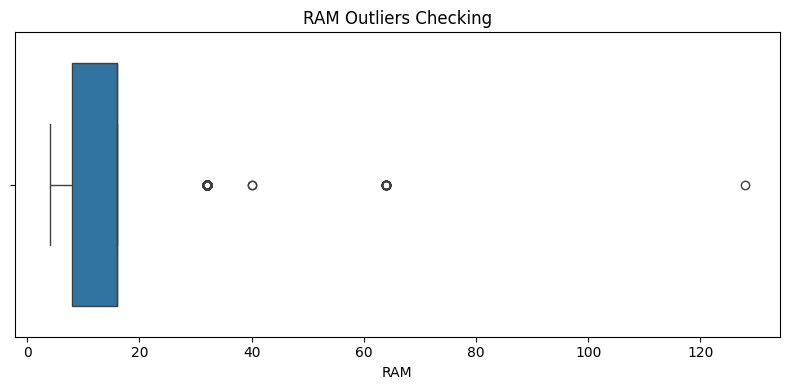

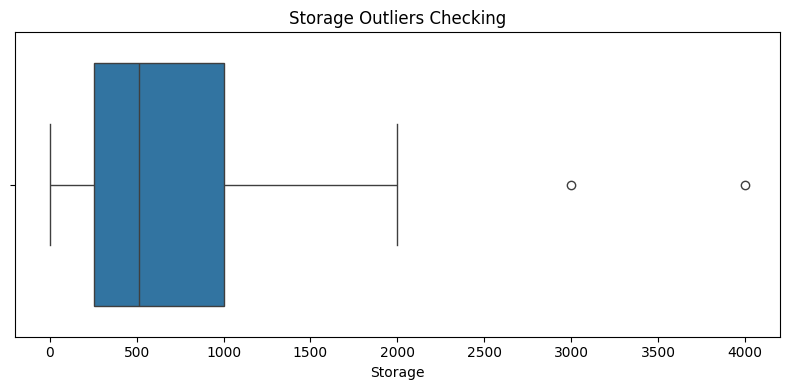

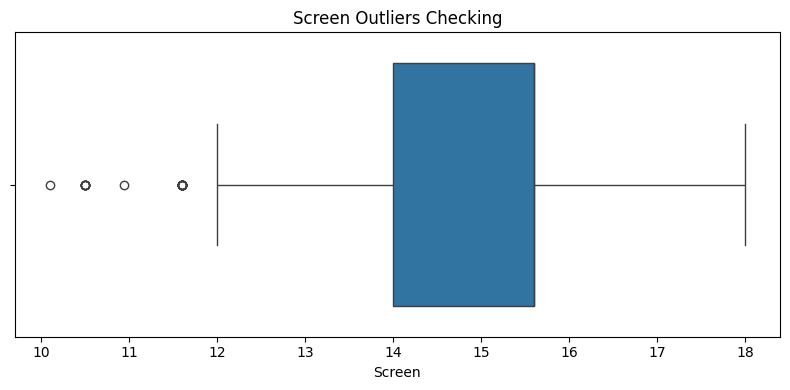

There is no major OutLiers present.........



In [12]:
print("Lets Check there is any outliers or not............\n")

temp = ['RAM','Storage','Screen']
for i in temp:
    plt.figure(figsize=(8,4))
    sns.boxplot(x = df[i])
    plt.title(f"{i} Outliers Checking")
    plt.tight_layout()
    plt.show()
print("There is no major OutLiers present.........\n")

In [13]:
print("Lets Arrange the Columns of the Datasets..............\n")
df.drop('Laptop',axis=1,inplace=True)
print("Removed 'Laptop' Column from this dataset.....................\n")

Lets Arrange the Columns of the Datasets..............

Removed 'Laptop' Column from this dataset.....................



In [14]:
df.head()

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,RTX 3050,15.6,No,1009.00
1,New,Alurin,Go,Intel Celeron,8,256,SSD,RTX 3050,15.6,No,299.00
2,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,RTX 3050,15.6,No,789.00
3,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,New,HP,15S,Intel Core i5,16,512,SSD,RTX 3050,15.6,No,669.01


In [15]:
#Lets Rearrange the Columns Name
print("Lets Rearange the Columns..............\n")
rearrange_columns = ['Brand','Model','CPU','Status','RAM','Storage','Storage type','GPU','Screen','Touch','Final Price']
df = df.reindex(columns=rearrange_columns)
print(df.head())

Lets Rearange the Columns..............

    Brand       Model            CPU Status  RAM  Storage Storage type  \
0    Asus  ExpertBook  Intel Core i5    New    8      512          SSD   
1  Alurin          Go  Intel Celeron    New    8      256          SSD   
2    Asus  ExpertBook  Intel Core i3    New    8      256          SSD   
3     MSI      Katana  Intel Core i7    New   16     1000          SSD   
4      HP         15S  Intel Core i5    New   16      512          SSD   

        GPU  Screen Touch  Final Price  
0  RTX 3050    15.6    No      1009.00  
1  RTX 3050    15.6    No       299.00  
2  RTX 3050    15.6    No       789.00  
3  RTX 3050    15.6    No      1199.00  
4  RTX 3050    15.6    No       669.01  


In [16]:
branch_unique = df['Brand'].unique()
Model_uniqie=df['Model'].unique()
CPU_unique = df['CPU'].unique()
GPU_unique = df['GPU'].unique()

print(branch_unique)
print(Model_uniqie)
print(CPU_unique)
print(GPU_unique)

['Asus' 'Alurin' 'MSI' 'HP' 'Lenovo' 'Medion' 'Acer' 'Apple' 'Razer'
 'Gigabyte' 'Dell' 'LG' 'Samsung' 'PcCom' 'Microsoft' 'Primux' 'Prixton'
 'Dynabook Toshiba' 'Thomson' 'Denver' 'Deep Gaming' 'Vant' 'Innjoo'
 'Jetwing' 'Millenium' 'Realme' 'Toshiba']
['ExpertBook' 'Go' 'Katana' '15S' 'Crosshair' 'ThinkPad' 'VivoBook'
 'Akoya' 'Victus' 'V15' 'Thin' 'ROG' 'IdeaPad' 'Cyborg' 'M515UA' 'TUF'
 'Aspire' 'Pavilion' 'Vector' 'Chromebook' 'Omen' 'ZenBook' 'Creator'
 'MacBook Air' 'ThinkBook' '250' 'Modern' '255' 'MacBook Pro' 'Prestige'
 'Stealth' 'Pulse' 'Blade' 'Legion' 'Raider' 'ProBook' 'F515' 'G5'
 'Vostro' 'Nitro' 'Gram' 'E410' 'Flex Advance' 'Bravo' 'Aero' 'Yoga'
 'Galaxy Book' 'Erazer' 'Summit' 'Ultra' 'Extensa' 'Flex' 'EliteBook'
 'Revolt' 'Latitude' 'Envy' 'Deputy' 'Predator' 'Surface Laptop' '14w'
 'Titan' 'Ioxbook' 'Aorus' 'Swift' 'Surface Go' 'Netbook Pro'
 'Surface Pro' 'Notebook' '470' 'Spectre' 'Alurin' 'Satellite Pro' 'XPS'
 'ConceptD' 'E510' 'Beast' 'TravelMate' 'Portégé' 'T

In [17]:
df.dtypes

Brand            object
Model            object
CPU              object
Status           object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

In [18]:
#Lets use the Encodeing Technique for the Labeled Columns.

print("We are Encode the Labeled Dataset using the Label Encoder Functions............\n")

temp1 = ['Brand','Model','CPU','Status','Storage type','GPU','Touch']

encoders = {}   

for col in temp1:
    lb = LabelEncoder()
    df[col] = lb.fit_transform(df[col])
    encoders[col] = lb 

print("Encoding Completed Using Label Encoder................\n")
print(df.head())

We are Encode the Labeled Dataset using the Label Encoder Functions............

Encoding Completed Using Label Encoder................

   Brand  Model  CPU  Status  RAM  Storage  Storage type  GPU  Screen  Touch  \
0      3     42   17       0    8      512             0   17    15.6      0   
1      1     54   14       0    8      256             0   17    15.6      0   
2      3     42   16       0    8      256             0   17    15.6      0   
3     14     58   18       0   16     1000             0   17    15.6      0   
4      9      4   17       0   16      512             0   17    15.6      0   

   Final Price  
0      1009.00  
1       299.00  
2       789.00  
3      1199.00  
4       669.01  


In [19]:
encoders

{'Brand': LabelEncoder(),
 'Model': LabelEncoder(),
 'CPU': LabelEncoder(),
 'Status': LabelEncoder(),
 'Storage type': LabelEncoder(),
 'GPU': LabelEncoder(),
 'Touch': LabelEncoder()}

In [20]:
#Define The X And Y Columns for the Training and testing data.
print("Define The X And Y Columns for the Training and testing data..........\n")
x = df.iloc[:,:-1]
y = df['Final Price']

Define The X And Y Columns for the Training and testing data..........



In [21]:
#Train Test Splot
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
#Lets Rescal the Dataset
print("Lets Rescale the Datasets using Standard Scaler.......\n")

scl = StandardScaler()
x_train_scaled = scl.fit_transform(x_train)
x_test_scaled = scl.transform(x_test)

Lets Rescale the Datasets using Standard Scaler.......



In [23]:
#I am Use the Linear Regression:- 
print("Now We are use the Linear Regression Model for Price Prediction..........\n")

lr = LinearRegression()

lr.fit(x_train_scaled, y_train)
y_predict_lr = lr.predict(x_test_scaled)

print("Mean Absolute Error(MAE):",round(mean_absolute_error(y_test,y_predict_lr),2))
print("Mean Squared Error(MSE):",round(mean_squared_error(y_test,y_predict_lr),2))
print(f"R2 Score(Model Accuracy) is ",round(r2_score(y_test,y_predict_lr),2)*100,"%")

Now We are use the Linear Regression Model for Price Prediction..........

Mean Absolute Error(MAE): 397.33
Mean Squared Error(MSE): 320669.78
R2 Score(Model Accuracy) is  65.0 %


In [24]:
#Lets Try The KNeighbors Regressor Model and Check the Accuracy.

knn = KNeighborsRegressor(n_neighbors=4)

knn.fit(x_train_scaled,y_train)
y_predict_knn = knn.predict(x_test_scaled)

print("Mean Absolute Error(MAE):",round(mean_absolute_error(y_test,y_predict_knn),2))
print("Mean Squared Error(MSE):",round(mean_squared_error(y_test,y_predict_knn),2))
print(f"R2 Score(Model Accuracy) is ",round(r2_score(y_test,y_predict_knn),2)*100,"%")

Mean Absolute Error(MAE): 300.24
Mean Squared Error(MSE): 216165.32
R2 Score(Model Accuracy) is  77.0 %


In [25]:
#Lets Check the Random Forest Regressor model
random_forest = RandomForestRegressor(random_state=42,n_estimators=200,max_depth=None)

random_forest.fit(x_train_scaled,y_train)
y_predict_rfr=random_forest.predict(x_test_scaled)

print("Mean Absolute Error(MAE):",round(mean_absolute_error(y_test,y_predict_rfr),2))
print("Mean Squared Error(MSE):",round(mean_squared_error(y_test,y_predict_rfr),2))
print(f"R2 Score(Model Accuracy) is ",round(r2_score(y_test,y_predict_rfr),2)*100,"%")

Mean Absolute Error(MAE): 249.54
Mean Squared Error(MSE): 159272.93
R2 Score(Model Accuracy) is  83.0 %


In [26]:
#Lets Use the XgBoost Regressor

xgb = XGBRegressor(random_state=42,
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=9)

xgb.fit(x_train_scaled,y_train)
y_predict_xgb = xgb.predict(x_test_scaled)

print("Mean Absolute Error(MAE):",round(mean_absolute_error(y_test,y_predict_xgb),2))
print("Mean Squared Error(MSE):",round(mean_squared_error(y_test,y_predict_xgb),2))
print(f"R2 Score(Model Accuracy) is ",round(r2_score(y_test,y_predict_xgb),2)*100,"%")

Mean Absolute Error(MAE): 243.56
Mean Squared Error(MSE): 175512.11
R2 Score(Model Accuracy) is  81.0 %


In [27]:
df['Storage type'].unique()

array([0, 1])

In [28]:
#User Input Module
print("Enter the User Input........\n")


Brand = input("Enter Brand of Laptop(Company Name):")
Model = input("Enter Model of Laptop(Like:Notebook,inspioron 15):")
CPU = input("Enter CPU of Laptop(Like:AMD Ryzen 7,intel core 8):")
Status = input("Enter the Status(ex.New or refurbished):")
RAM = int(input("Enter the RAM(ex. 8):"))
Storage = int(input("Enter the Storage(ex. 512):"))
Storage_type = input("Enter the Storage type of the Laptop(ex. HDD,SSD):")
GPU = input("Enter GPU of Laptop(Like:RTX 3050,RTX 3090):")
Screen = float(input("Enter the Screen Size into Inches(Ex. 15.6):"))
Touch = input("Enter the Touch Screen Yes/No :")

new_df = {
    "Brand":Brand,
    "Model":Model,       
    "CPU":CPU,       
    "Status":Status,         
    "RAM":RAM,           
    "Storage":Storage,       
    "Storage type":Storage_type, 
    "GPU":GPU,
    "Screen":Screen,       
    "Touch":Touch      
}
 
new_df = pd.DataFrame([new_df])

#Encode all the Catagorical data Values.
for i in temp1:
    if new_df[i][0] in encoders[i].classes_:
        new_df[i] = encoders[i].transform(new_df[i])
    else:
        new_df[i] = [-1]

new_df = new_df[x.columns]

#scal down all the userinput data.

scaled_data = scl.transform(new_df)

lr_predicted_price = lr.predict(scaled_data)
rfr_predicted_price = random_forest.predict(scaled_data)
knn_predicted_price = knn.predict(scaled_data)
xgb_predicted_price = xgb.predict(scaled_data)

indr = float(input("Enter the Current 1$ Price in INDIAN Rupee:\n"))

lr_predicted_price *= indr
rfr_predicted_price *= indr
knn_predicted_price *= indr
xgb_predicted_price *= indr


print("Predicted Price from the Linear Regresion Model:",round(lr_predicted_price[0],2))
print("Predicted Price from the Randome Forest Regresson Model:",round(rfr_predicted_price[0],2))
print("Predicted Price from the KNN Model:",round(knn_predicted_price[0],2))
print("Predicted Price from the XG Boost Model:",round(xgb_predicted_price[0],2))


Enter the User Input........

Predicted Price from the Linear Regresion Model: 49808.49
Predicted Price from the Randome Forest Regresson Model: 34970.26
Predicted Price from the KNN Model: 30546.66
Predicted Price from the XG Boost Model: 43616.25


In [29]:
model = {
    "encoders": encoders,              
    "Standard_scaler": scl,            
    "Linear_Regression_model": lr,    
    "Random_Forest_regressor": random_forest,  
    "knn_model": knn,                
    "xgboost_model": xgb,              
    "columns": list(x.columns)         
    
}

with open("Models/laptop_price_prediction.pkl", "wb") as f:
    pickle.dump(model, f)

print("\nPickle File Created Successfully!")


Pickle File Created Successfully!
